![](https://img-aws.ehowcdn.com/560x560/photos.demandstudios.com/getty/article/151/36/87689206.jpg)

# More To Come. Stay Tuned. !!
In this Notrebook, I did  Google Landmark Retrieval Exploratory Analysis.
If there are any suggestions/changes you would like to see in the Kernel please let me know :). Appreciate every ounce of help!

This notebook will always be a work in progress. Please leave any comments about further improvements to the notebook! Any feedback or constructive criticism is greatly appreciated!.
** If you like it or it helps you , you can upvote and/or leave a comment :).**


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
train_data = pd.read_csv('/home/data/LandmarkRetrieval/index.csv')
test_data = pd.read_csv('/home/data/LandmarkRetrieval/test.csv')
submission = pd.read_csv('/home/data/LandmarkRetrieval/sample_submission.csv')

In [3]:
print("Training data size",train_data.shape)
print("test data size",test_data.shape)

Training data size (1098461, 2)
test data size (117703, 2)


In [4]:
train_data.head()

,id,url
0,b09ea096f4daa42e,https://lh5.googleusercontent.com/-wBt6sklzbGs...
1,6648383c7b3a438c,https://lh3.googleusercontent.com/-OADWsOZq83E...
2,d485d9f770e40453,https://lh5.googleusercontent.com/-vtZFUTuFWGM...
3,e7cdfba9ec7e9dd5,https://lh4.googleusercontent.com/-Skq6Q-VUALk...
4,44806beb654e6410,https://lh4.googleusercontent.com/-6eIkjkr3j2w...


In [5]:
test_data.head()

,id,url
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...


In [6]:
submission.head()

,id,images
0,000088da12d664db,0370c4c856f096e8 766677ab964f4311 e3ae4dcee813...
1,0001623c6d808702,b01175326ee19742 67eb4fc9ff184bd2 0f775e72c031...
2,0001bbb682d45002,5101d06f891261be ae9c548dcf7102e2 a42098eb2dd3...
3,0002362830cfe3a3,40cb31b754bb7249 f860d7fbb0073fab 492c16c0584d...
4,000270c9100de789,fe3a62d9b50ca221 5005114ed61af1bc 754e137d888d...


In [7]:
# now open the URL
temp = 4444
print('id', train_data['id'][temp])
print('url:', train_data['url'][temp])

id 731bf321dc92bdfc
url: https://lh4.googleusercontent.com/-gQEUjiYZrAA/UhcFIFIAJXI/AAAAAAAAE_o/yZ_s7e_zWvg/s1600/


In [8]:
# missing data in training data 
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
url,0,0.0
id,0,0.0


In [9]:
# missing data in test data 
total = test_data.isnull().sum().sort_values(ascending = False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending = False)
missing_test_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_test_data.head()

,Total,Percent
url,0,0.0
id,0,0.0


## Lets display some images from URLs

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(20).iteritems()])

    display(HTML(images_list))

In [23]:
urls = train_data['url']
display_category(urls, "")

In [12]:
urls = train_data['url']
display_category(urls, "")

## Lets see unique URL

In [13]:
# Unique URL's
print(type(train_data))
train_data.nunique()

<class 'pandas.core.frame.DataFrame'>


id     1098461
url    1098461
dtype: int64

## All URLs are unique.

## Now Lets extract the website names and see their occurances

In [14]:
# Extract site_names for train data
temp_list = list()
for path in train_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
train_data['site_name'] = temp_list
# Extract site_names for test data
temp_list = list()
for path in test_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
test_data['site_name'] = temp_list

### We have added one new column "site_name". lets see

In [15]:
print("Training data size",train_data.shape)
print("test data size",test_data.shape)

Training data size (1098461, 3)
test data size (117703, 3)


In [16]:
train_data.head(8)

,id,url,site_name
0,b09ea096f4daa42e,https://lh5.googleusercontent.com/-wBt6sklzbGs...,lh5.googleusercontent.com
1,6648383c7b3a438c,https://lh3.googleusercontent.com/-OADWsOZq83E...,lh3.googleusercontent.com
2,d485d9f770e40453,https://lh5.googleusercontent.com/-vtZFUTuFWGM...,lh5.googleusercontent.com
3,e7cdfba9ec7e9dd5,https://lh4.googleusercontent.com/-Skq6Q-VUALk...,lh4.googleusercontent.com
4,44806beb654e6410,https://lh4.googleusercontent.com/-6eIkjkr3j2w...,lh4.googleusercontent.com
5,bbecba89db6a9bec,https://lh5.googleusercontent.com/-NIQkGN6FRuw...,lh5.googleusercontent.com
6,b03b500b28655072,http://lh5.ggpht.com/-aHODQcvDw30/S-g3zWUjSZI/...,lh5.ggpht.com
7,f3ba87e473810669,https://lh3.googleusercontent.com/-2-gT2aJmcJ4...,lh3.googleusercontent.com


In [17]:
test_data.head()

,id,url,site_name
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...,lh3.googleusercontent.com
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...,lh3.googleusercontent.com
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...,lh3.googleusercontent.com
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...,lh3.googleusercontent.com
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...,lh3.googleusercontent.com


### occurances of sites in train_data

In [18]:
# Occurance of site in decreasing order(Top categories)
temp = pd.DataFrame(train_data.site_name.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['site_name','count']
temp

,site_name,count
0,lh3.googleusercontent.com,162104
1,lh4.googleusercontent.com,158798
2,lh5.googleusercontent.com,156027
3,lh6.googleusercontent.com,152010
4,lh3.ggpht.com,96044
5,lh4.ggpht.com,93126
6,lh6.ggpht.com,92889
7,lh5.ggpht.com,92173
8,mw2.google.com,83782
9,static.panoramio.com,10932


### As we can see there are total 17 unique sites.

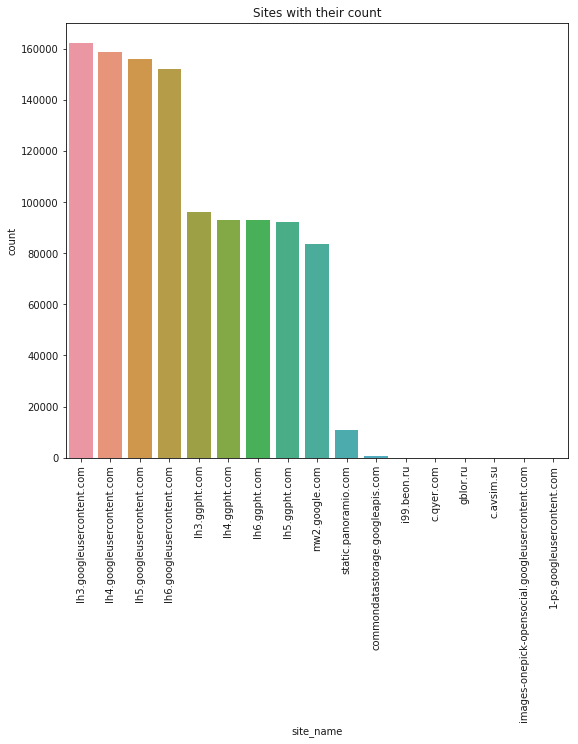

In [19]:
# Plot the Sites with their count
plt.figure(figsize = (9, 8))
plt.title('Sites with their count')
sns.set_color_codes("pastel")
sns.barplot(x="site_name", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

### occurances of sites in test_data

In [20]:
# Occurance of site in decreasing order(Top categories)
temp = pd.DataFrame(test_data.site_name.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['site_name','count']
temp

,site_name,count
0,lh3.googleusercontent.com,116855
1,lh3.ggpht.com,166
2,lh5.ggpht.com,134
3,lh4.ggpht.com,123
4,images1-focus-opensocial.googleusercontent.com,102
5,lh6.ggpht.com,92
6,lh5.googleusercontent.com,80
7,lh4.googleusercontent.com,55
8,static.panoramio.com,47
9,lh6.googleusercontent.com,28


### Total unique sites are 25 in test data and some are different from train_data

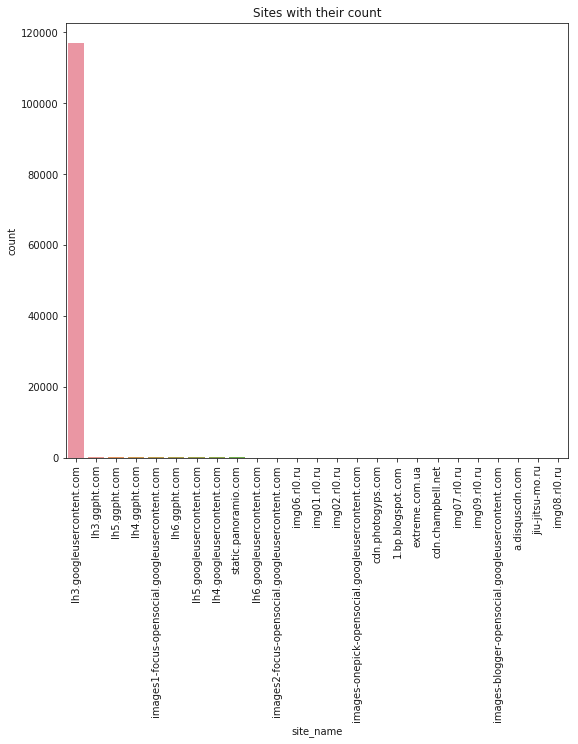

In [21]:
# Plot the Sites with their count
plt.figure(figsize = (9, 8))
plt.title('Sites with their count')
sns.set_color_codes("pastel")
sns.barplot(x="site_name", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

### As we can see that most of the images are taken from one site only.